라이브러리 로드

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

데이터셋로드

In [30]:
df = pd.read_csv("data/diabetes_feature.csv")
df.shape

(768, 16)

In [31]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_insulin
0,6,0.848324,72,35,0,33.6,0.468492,50,1,False,False,True,False,169.5,5.138735,False
1,1,-1.123396,66,29,0,26.6,-0.365061,31,0,False,False,True,False,102.5,4.639572,True
2,8,1.943724,64,0,0,23.3,0.604397,32,1,True,False,True,False,169.5,5.138735,False
3,1,-0.998208,66,23,94,28.1,-0.920763,21,0,False,True,False,False,94.0,4.553877,True
4,0,0.504055,40,35,168,43.1,5.484909,33,1,False,False,True,False,168.0,5.129899,False


학습과 에측에 사용할 데이터셋 만들기

In [32]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Pregnancies_high',
       'Age_low', 'Age_middle', 'Age_high', 'Insulin_nan', 'Insulin_log',
       'low_glu_insulin'],
      dtype='object')

In [33]:
X = df[[ 'Glucose', 'BloodPressure', 'SkinThickness', 
       'BMI', 'DiabetesPedigreeFunction', 'Age',  'Pregnancies_high', 'Insulin_nan', 
       'low_glu_insulin']]
X.shape

(768, 9)

In [34]:
y = df['Outcome']
y.shape

(768,)

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42)

In [36]:
X_train.shape, y_train.shape

((614, 9), (614,))

In [37]:
X_test.shape, y_test.shape

((154, 9), (154,))

모데링

In [38]:
#single tree
#from sklearn.tree import DecisionTreeClassifier
#model = DecisionTreeClassifier(random_state=42)
#model

In [39]:
#bagging
#from sklearn.ensemble import RandomForestClassifier

#model = RandomForestClassifier(n_estimators=100 , random_state=42)
#model

In [40]:
#boosting
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(random_state=42)
model

GradientBoostingClassifier(random_state=42)

Random Search

학습과 예측하기

In [42]:
#학습시키기
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [43]:
model.feature_importances_

array([1.06409948e-01, 7.04053663e-03, 6.57236021e-02, 3.73742490e-02,
       2.62954875e-02, 9.47259928e-02, 1.56708089e-04, 6.62273475e-01,
       0.00000000e+00])

In [44]:
feature_names = X_train.columns.tolist()

<AxesSubplot:>

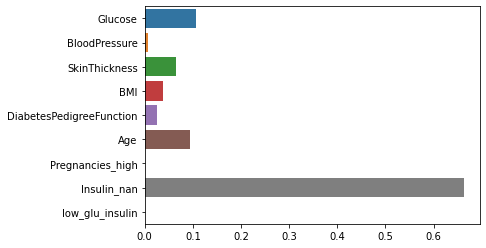

In [45]:
sns.barplot(x=model.feature_importances_,y = feature_names)

In [46]:
y_predict = model.predict(X_test)
y_predict[:5]

array([1, 0, 0, 0, 0], dtype=int64)

정확도 측정하기

In [47]:
#다르게 예측한 갯수를 구해서 diff_count에 할당
#DT : 28
#RF : 20
#GB : 24
(y_predict != y_test).sum()

24

In [48]:
#accuracy score를 구하기
#DT : 0.818
#RF : 0.870
#GB : 0.844
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.8441558441558441